In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
ACS=pd.read_csv('Abalone Case Study.csv')

In [5]:
ACS

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
ACS.shape

(4177, 9)

There are 4177 columns and 9 rows in this dataset

In [7]:
ACS.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Columns in dataset

In [8]:
ACS.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

one column is object typr which will hvae to change in int or float

In [9]:
ACS.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in data set

In [10]:
ACS.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Rings is our target variable and above are categories in the target variable.

In [11]:
ACS.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Above is count of rows for each categorised ring

#### Change the oject column to int 

In [12]:
from sklearn import preprocessing

In [13]:
LE=preprocessing.LabelEncoder()

In [14]:
z=LE.fit_transform(ACS.iloc[:,0:1])

In [15]:
z.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [16]:
ACS.insert(0,'SEX',z,True)

In [17]:
ACS

,SEX,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,0,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [18]:
ACS.drop('Sex',axis=1,inplace=True)

In [19]:
ACS

,SEX,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Now we have all the column in numerical form.

#### Correlation

In [20]:
ACS.corr()

,SEX,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
SEX,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


SEX is negatively correlated with all coumns

Will check the correlation through heatmap

<AxesSubplot:>

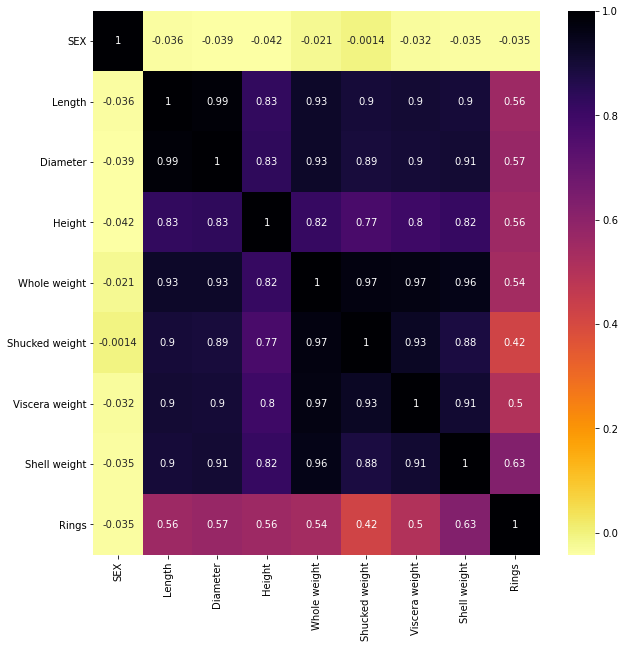

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(ACS.corr(),annot=True,cmap='inferno_r')

Rings is least correlated with SEX

Rings is highly correlated with shell weight,length,diameter and height.

### Univariative analysis

<AxesSubplot:xlabel='SEX', ylabel='count'>

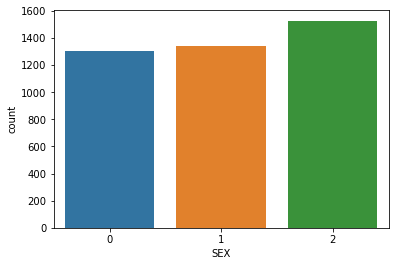

In [22]:
sns.countplot(ACS['SEX'])

0- Female
1-Infant
2-Male

The count of male is highest inthe data set.

<AxesSubplot:xlabel='Rings', ylabel='count'>

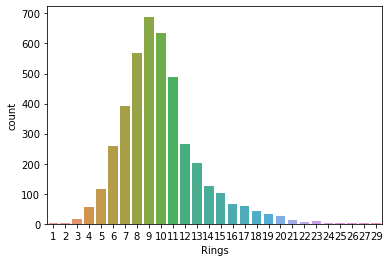

In [23]:
sns.countplot(ACS['Rings'])

There are more abalone wit 9 rings, most of abalones are from 6 rings to 12 rings.

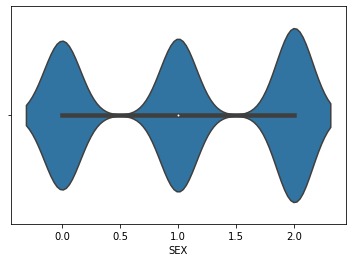

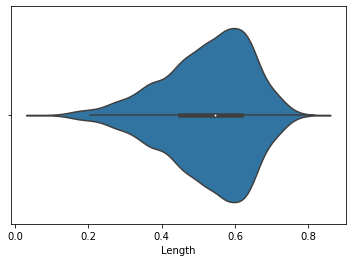

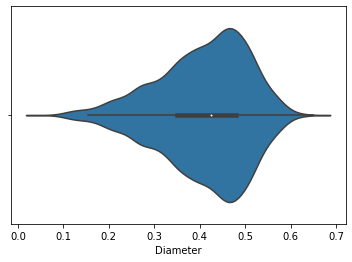

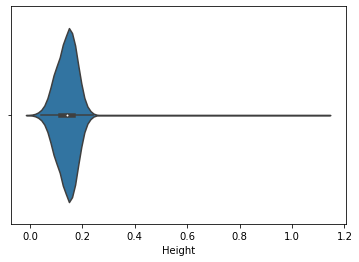

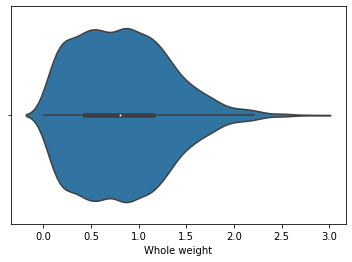

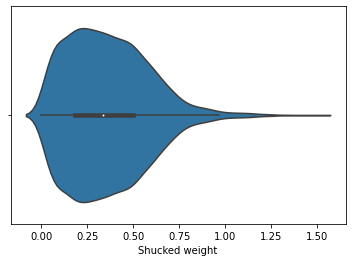

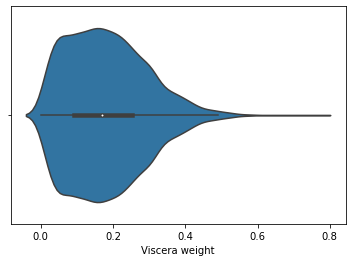

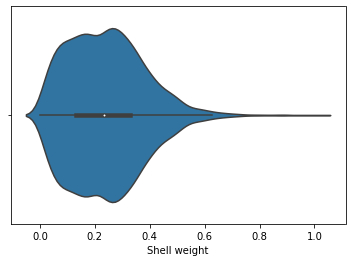

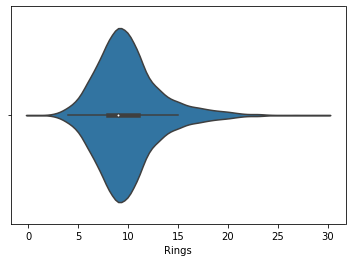

In [24]:
for i in ACS.columns:
    sns.violinplot(ACS[i])
    plt.show()

Most abalone are ranging in length from 0.4 mm to 0.8 mm

Most abalone are ranging in Diameter from 0.3 mm to 0.6 mm

Height of abalone is dense from 0.05 to 0.2.

Whole Weight of abalone ranges from 0.1 to 1.5gm in most cases.

Most abalones range with 6 to 15 rings. 

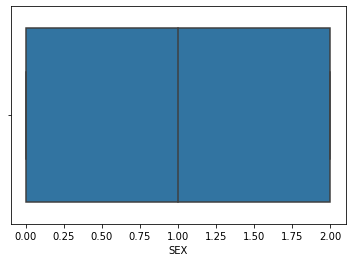

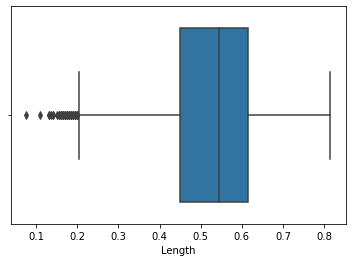

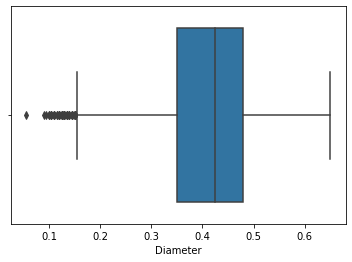

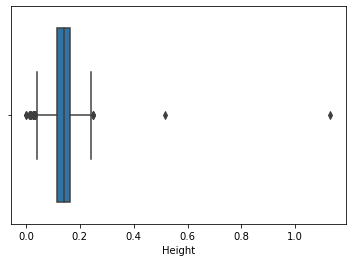

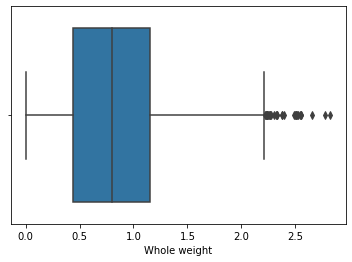

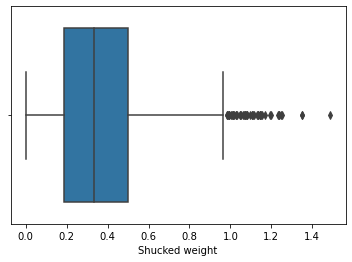

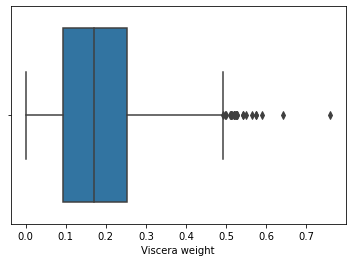

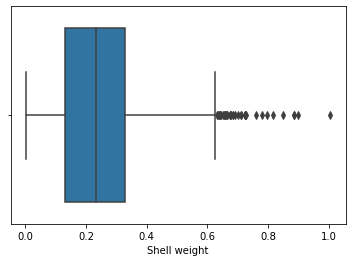

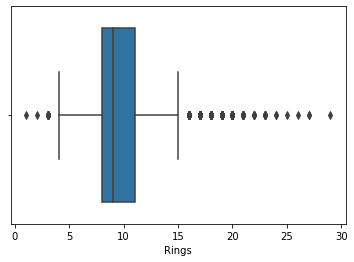

In [25]:
for i in ACS.columns:
    sns.boxplot(ACS[i])
    plt.show()

From above boxplot it makes us clear that outliers are present in most of columns, whichwill have to clear.

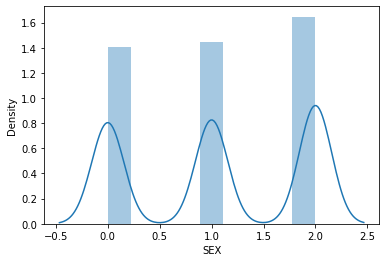

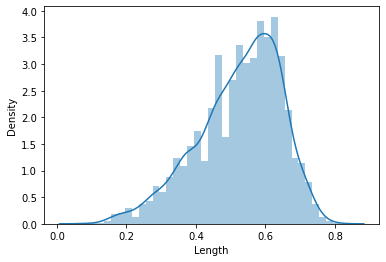

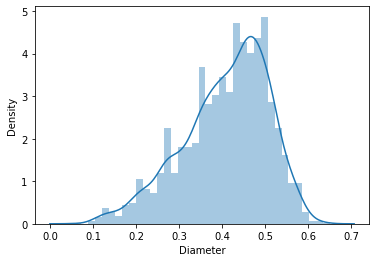

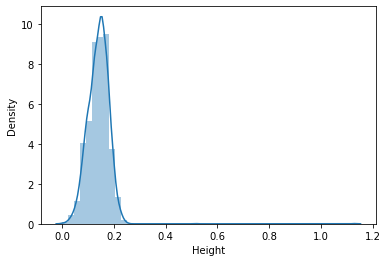

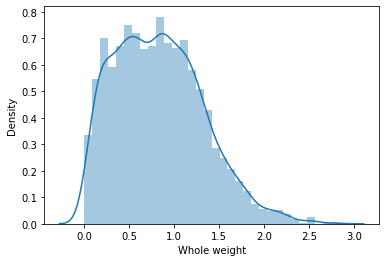

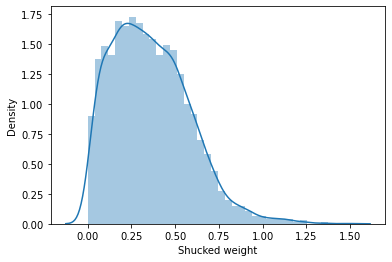

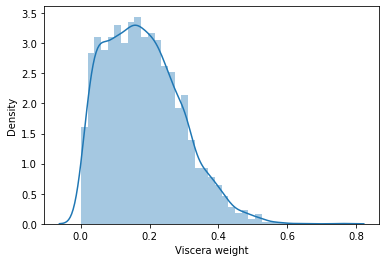

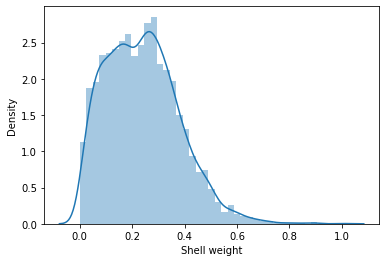

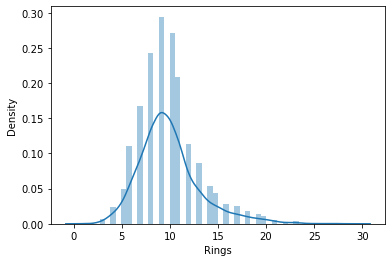

In [26]:
for i in ACS.columns:
    sns.distplot(ACS[i])
    plt.show()

Length and Diameter are left skeweed

All weight columns are right skewed.

#### Bivariative Analysis

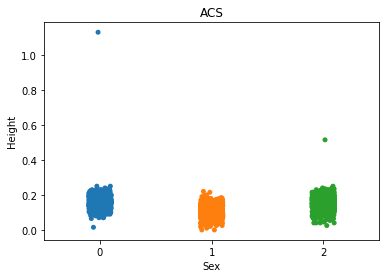

In [27]:
ax=sns.stripplot(ACS['SEX'],ACS['Height'])
ax.set(xlabel='Sex',ylabel='Height')
plt.title('ACS')
plt.show()

Height and sex of abalone is uniformly distributed for gender.

<function matplotlib.pyplot.show(close=None, block=None)>

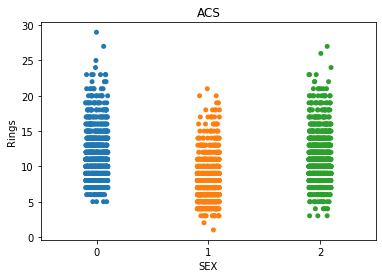

In [28]:
sns.stripplot(ACS['SEX'],ACS['Rings'])
ax.set(xlabel='SEX',ylabel='Rings')
plt.title('ACS')
plt.show

Female and male abalone ahve more rings compared to infant.

<AxesSubplot:xlabel='Diameter', ylabel='Whole weight'>

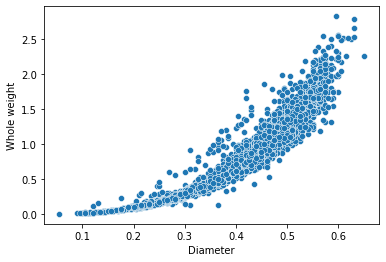

In [29]:
sns.scatterplot(ACS['Diameter'],ACS['Whole weight'])

Diameter and Whole Weight is positively related.

In [30]:
ACS.columns

Index(['SEX', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

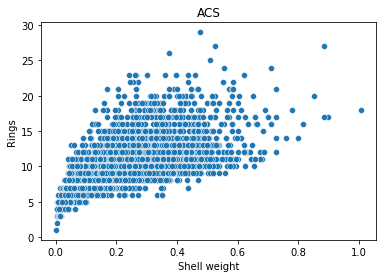

In [31]:
sns.scatterplot(ACS['Shell weight'],ACS['Rings'])
ax.set(xlabel='Shell weight',ylabel='Rings')
plt.title('ACS')
plt.show

Shell weight ranging from 0.2gm to 0.6gm have rings mostly in ramge from 5 to 20.

<function matplotlib.pyplot.show(close=None, block=None)>

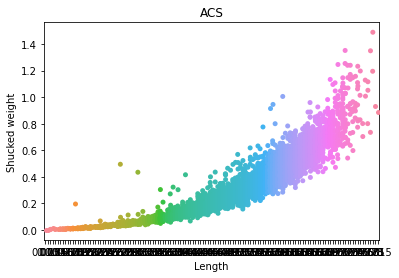

In [32]:
sns.stripplot(ACS['Length'],ACS['Shucked weight'])
ax.set(xlabel='Length',ylabel='shucked weight')
plt.title('ACS')
plt.show

Length is positively related with shucked weight.

<function matplotlib.pyplot.show(close=None, block=None)>

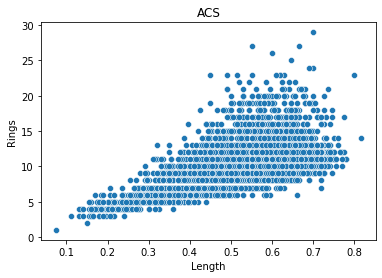

In [33]:
sns.scatterplot(ACS['Length'],ACS['Rings'])
ax.set(xlabel='Length',ylabel='Rings')
plt.title('ACS')
plt.show

Greater the length of the abalone more the rings.

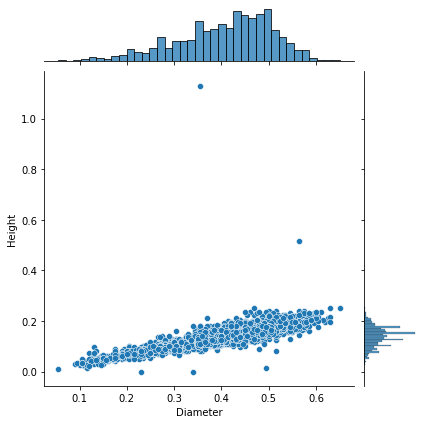

In [34]:
sns.jointplot(x='Diameter',y='Height',data=ACS)
plt.show()

Height of abalone increases with increase in diameter.

### Mutivariative Analysis

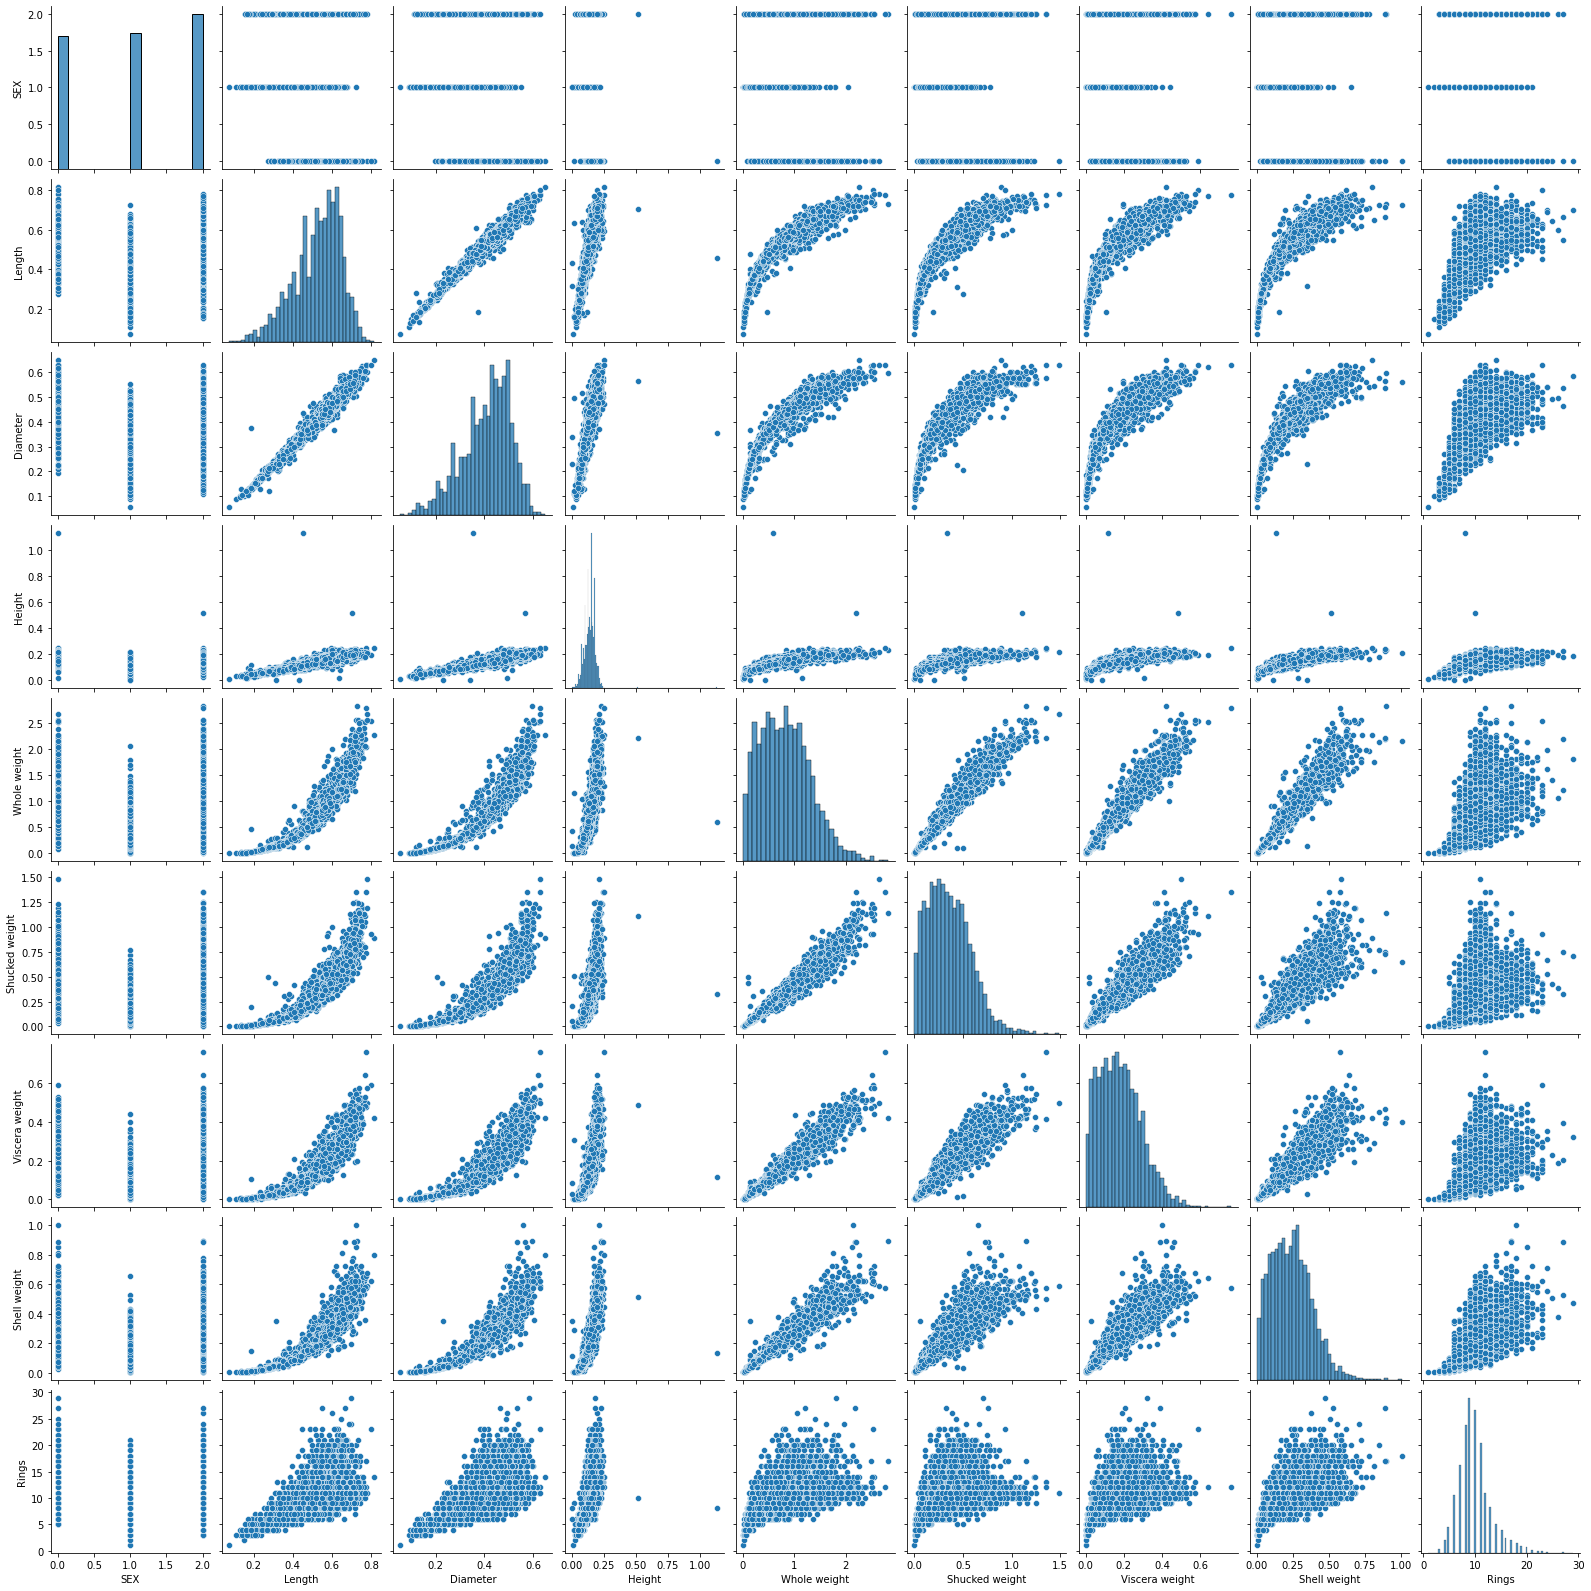

In [35]:
sns.pairplot(ACS)

### Outlier

In [36]:
z=np.abs(zscore(ACS))

In [37]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [38]:
ACS_new=ACS[(z<3).all (axis=1)]

In [39]:
ACS_new

,SEX,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
ACS.shape

(4177, 9)

In [41]:
ACS_new.shape

(4027, 9)

After applying zscore method to remove the outliers 150 rows have been deleted from dataset.Which leads to losing of 3-4% of data, which is acceptable.

### Skewness

In [42]:
x=ACS_new.drop('Rings',axis=1)
y=ACS_new.iloc[:,8:9]

In [43]:
x

,SEX,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [44]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


Data set is divided into X and Y

Check the skewness of X

In [45]:
x.skew()

SEX              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

Need to correct the skewnees of length and Diameter column

In [55]:
x_train.shape

(2818, 8)

In [57]:
y_train.shape

(2818, 1)

In [58]:
x_test.shape

(1209, 8)

In [59]:
y_test.shape

(1209, 1)

### MODEL

In [88]:


maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    ac=r2_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best r2_score at x is',maxAccu*100,'at random state',maxRS)      

Best r2_score at x is 55.246970767563795 at random state 82


As we are not getting good score will delete the whole weight column

In [47]:
x_1=ACS_new.drop(['Rings','Whole weight','Viscera weight'],axis=1)

In [48]:
x_1

,SEX,Length,Diameter,Height,Shucked weight,Shell weight
0,2,0.455,0.365,0.095,0.2245,0.1500
1,2,0.350,0.265,0.090,0.0995,0.0700
2,0,0.530,0.420,0.135,0.2565,0.2100
3,2,0.440,0.365,0.125,0.2155,0.1550
4,1,0.330,0.255,0.080,0.0895,0.0550
...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2490
4173,2,0.590,0.440,0.135,0.4390,0.2605
4174,2,0.600,0.475,0.205,0.5255,0.3080
4175,0,0.625,0.485,0.150,0.5310,0.2960


In [49]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_1train,x_1test,y_train,y_test=train_test_split(x_1,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_1train,y_train)
    predf=LR.predict(x_1test)
    ac=r2_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('best accuracy score for x_1 is ',maxAccu*100,'at random state',maxRS)      

best accuracy score for x_1 is  53.26103990108637 at random state 139


#### R2_score reduces if we remove the columns, hence will not remove the columns

#### We will run the Linear Regression model with random_state = 82

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=82)
LR=LinearRegression()
LR.fit(x_train,y_train)
predf=LR.predict(x_test)
print(r2_score(y_test,predf))

0.552469707675638


In [52]:
LR.coef_

array([[  0.02924007,  -2.65875219,  13.47534544,  22.20184255,
        -10.77588444,  16.71087912]])

In [62]:
pred=LR.predict(x_test)

print('the predicted value :',pred)
print('The actual value:',y_test)

the predicted value : [[10.42520929]
 [11.63410006]
 [ 6.67114544]
 ...
 [10.36958853]
 [14.31202294]
 [11.35305122]]
The actual value:       Rings
3662      8
3246     13
136       7
963       9
2055      9
...     ...
2962      9
2456      5
1366      9
1758     11
3391     13

[1209 rows x 1 columns]


In [63]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))


print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error 1.5139321975746516
mean squared error 3.927482572003846
root mean squared error 1.9817877212264299


### Cross validation of the model:

In [98]:
pred_train=LR.predict(x_train)
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,predf)

for j in range(2,10):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'cv {j}the cv score is{cv_mean}accuracy of train score is{Train_accuracy}test accuracy score is{Test_accuracy}')
    print('\n')

cv 2the cv score is0.5091519690309692accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 3the cv score is0.4957733082809948accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 4the cv score is0.42089930240702accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 5the cv score is0.4148020401486133accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 6the cv score is0.4266020242275066accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 7the cv score is0.43688004459691293accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 8the cv score is0.3982019996299326accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638


cv 9the cv score is0.4278869319401447accuracy of train score is0.4945937892613057test accuracy score is0.552469707675638




The model runs better at cross fold = 2

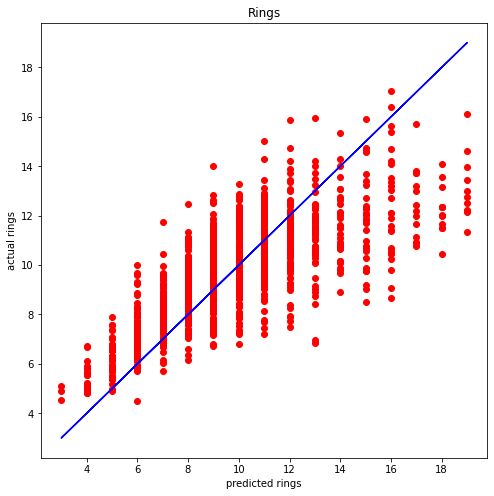

In [100]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted rings')
plt.ylabel('actual rings')
plt.title('Rings')
plt.show()

Above we can see model is somewhat behaving the same way the actual it is.

### Regularization

In [64]:
from sklearn.linear_model import Lasso,Ridge

#### LASSO

In [104]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('The r2_score using lasso is:',r2_score(y_test,pred_ls))

The r2_score using lasso is: 0.5523229683279958


### Ridge

In [105]:
rd=Ridge(alpha=.01) #rd=ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,pred_rd))

The r2_score using ridge is: 0.5524186596549359


### Elastic Net

In [106]:
from sklearn.linear_model import ElasticNet

EN=ElasticNet(alpha=0.0001)

EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,pred_rd))

The r2_score using ridge is: 0.5524186596549359


#### HYPER TUNNING FOR LASSO

In [71]:
from sklearn.model_selection import GridSearchCV

param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cv=GridSearchCV(estimator=ls,param_grid=param,scoring='neg_mean_absolute_error',cv=4,return_train_score=True,verbose=1)

model_cv.fit(x_train,y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


GridSearchCV(cv=4, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.6, 0.8, 1.0, 2.0, 5.0, 10.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
model_cv.best_params_

{'alpha': 0.0001}

#### RIDGE HYPER TUNNING FOR RIDGE

In [76]:
from sklearn.model_selection import GridSearchCV

param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cv=GridSearchCV(estimator=rd,param_grid=param,scoring='neg_mean_absolute_error',cv=4,return_train_score=True,verbose=1)

model_cv.fit(x_train,y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


GridSearchCV(cv=4, estimator=Ridge(alpha=1e-05),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.6, 0.8, 1.0, 2.0, 5.0, 10.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
model_cv.best_params_

{'alpha': 0.01}

Ridge performs better at alhpa : 0.01 ,hence we have run ridge with alpha:0.01 above.

#### ENSEMBLE TECHNIQUE

In [113]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()

In [114]:
params = { 'criterion': ['mse','mae'],'max_features': ['auto','sqrt','log2']}

In [116]:
grid_search=GridSearchCV(rf,params)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [117]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)


print('The r2_score using rf is:',r2_score(y_test,pred_rf))

rf_score=cross_val_score(rf,x,y,cv=2)
rfc=rf_score.mean()
print('The cross val score for RF is',rfc)

The r2_score using rf is: 0.5621046305055395
The cross val score for RF is 0.5219744920958211


#### Final score for ABALONE DATA SET can be considered as LASSO as it is giving highest r2_score 55.24%

### JOBLIB

In [118]:
joblib.dump(ls,'ACS.obj')

['ACS.obj']